<a href="https://colab.research.google.com/github/hhemesat/MAT-421/blob/main/ModuleH.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# The Euler Method

---



The differential of sin(X) is cos(x), and cos(0) = 1, so this is our intial condition. Let us approximate the solution to this initial value problem between 0 and 1 in increments of 0.1 using the Explicity Euler Formula. 

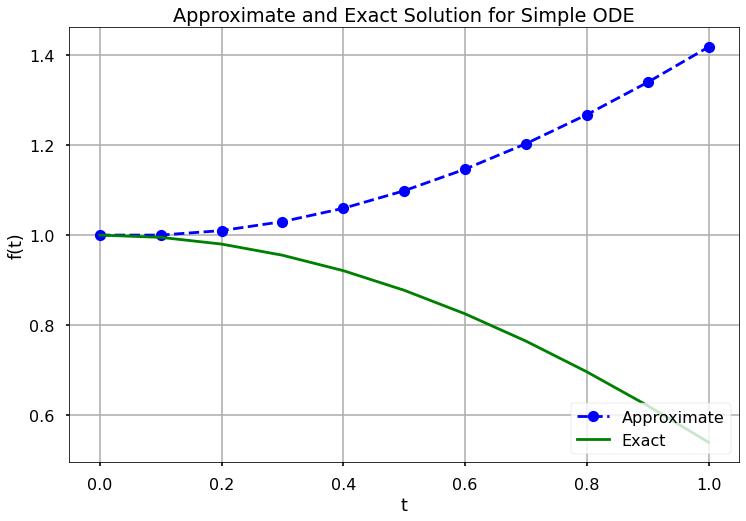

In [4]:
import numpy as np
import matplotlib.pyplot as plt

plt.style.use('seaborn-poster')
%matplotlib inline

# Define parameters
f = lambda t, s: np.sin(t) # ODE
h = 0.1
t = np.arange(0, 1 + h, h)
s0 = 1 # Initial Condition

# Explicit Euler Method
s = np.zeros(len(t))
s[0] = s0

for i in range(0, len(t) - 1):
    s[i + 1] = s[i] + h*f(t[i], s[i])

plt.figure(figsize = (12, 8))
plt.plot(t, s, 'bo--', label='Approximate')
plt.plot(t, np.cos(t), 'g', label='Exact')
plt.title('Approximate and Exact Solution \
for Simple ODE')
plt.xlabel('t')
plt.ylabel('f(t)')
plt.grid()
plt.legend(loc='lower right')
plt.show()

We repeat the above process with a smaller step sizr of 0.01.

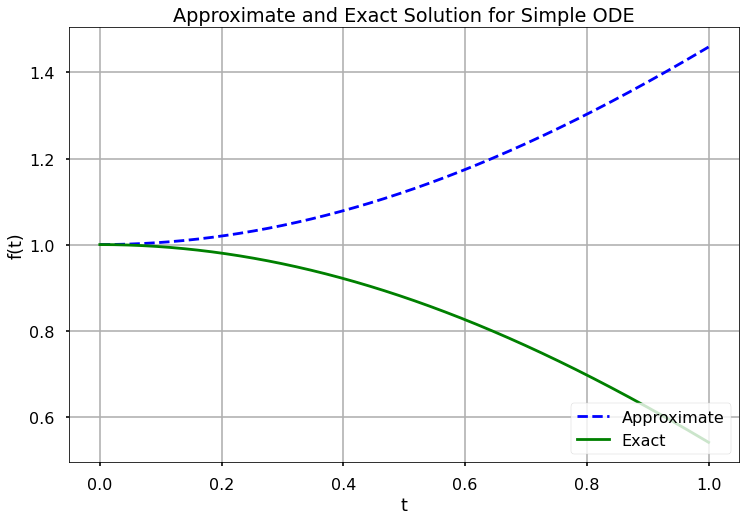

In [7]:
import numpy as np
import matplotlib.pyplot as plt

plt.style.use('seaborn-poster')
%matplotlib inline

# Define parameters
f = lambda t, s: np.sin(t) # ODE
h = 0.001
t = np.arange(0, 1 + h, h)
s0 = 1 # Initial Condition

# Explicit Euler Method
s = np.zeros(len(t))
s[0] = s0

for i in range(0, len(t) - 1):
    s[i + 1] = s[i] + h*f(t[i], s[i])

plt.figure(figsize = (12, 8))
plt.plot(t, s, 'b--', label='Approximate')
plt.plot(t, np.cos(t), 'g', label='Exact')
plt.title('Approximate and Exact Solution \
for Simple ODE')
plt.xlabel('t')
plt.ylabel('f(t)')
plt.grid()
plt.legend(loc='lower right')
plt.show()